#Create the environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [3]:
import pandas as pd
import xarray as xr
import numpy as np

These are the bins I use to rescale my grid

In [4]:
lat_bins = np.arange(43,51.25,0.25)
lat_bins

array([43.  , 43.25, 43.5 , 43.75, 44.  , 44.25, 44.5 , 44.75, 45.  ,
       45.25, 45.5 , 45.75, 46.  , 46.25, 46.5 , 46.75, 47.  , 47.25,
       47.5 , 47.75, 48.  , 48.25, 48.5 , 48.75, 49.  , 49.25, 49.5 ,
       49.75, 50.  , 50.25, 50.5 , 50.75, 51.  ])

In [5]:
lon_bins = np.arange(4,12.25,0.25)
lon_bins

array([ 4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,
        6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,
        8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 ,
       10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ])

#Upload the emissions dataset

Exploring the dataset

In [6]:
NOX_dataset = xr.open_dataset('MAY_HOURLY_2019_NOX_reduced.nc')
NOX_dataset = NOX_dataset.sortby(['latitude','longitude','time'])  
NOX_dataset  

<xarray.Dataset>
Dimensions:         (latitude: 82, longitude: 82, time: 720)
Coordinates:
  * longitude       (longitude) float64 4.0 4.1 4.2 4.3 ... 11.8 11.9 12.0 12.1
  * latitude        (latitude) float64 42.95 43.05 43.15 ... 50.85 50.95 51.05
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             int32 ...
    EMISSIONS_2019  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

In [7]:
NOX_dataframe = NOX_dataset.to_dataframe()
NOX_dataframe = NOX_dataframe.reset_index()
NOX_dataframe.head()

,latitude,longitude,time,crs,EMISSIONS_2019
0,42.949999,4.0,2019-05-01 01:00:00,-2147483647,1.178605e-12
1,42.949999,4.0,2019-05-01 02:00:00,-2147483647,8.014512e-13
2,42.949999,4.0,2019-05-01 03:00:00,-2147483647,7.071629e-13
3,42.949999,4.0,2019-05-01 04:00:00,-2147483647,6.600186e-13
4,42.949999,4.0,2019-05-01 05:00:00,-2147483647,8.014512e-13


I need to change the scale of the grid of the latitude and the longitude

In [8]:
NOX_dataset_tot = NOX_dataset.interp(latitude=lat_bins, longitude=lon_bins, method="linear")
NOX_dataset_tot

<xarray.Dataset>
Dimensions:         (latitude: 33, longitude: 33, time: 720)
Coordinates:
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
  * latitude        (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude       (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables:
    crs             int32 -2147483647
    EMISSIONS_2019  (time, latitude, longitude) float64 1.15e-12 ... 1.858e-11
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

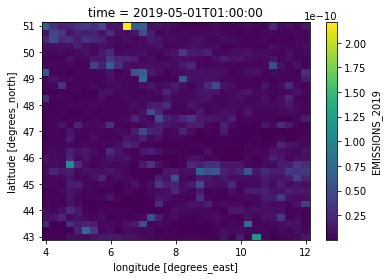

In [9]:
NOX_dataset_tot.isel(time=[0]).EMISSIONS_2019.plot()

#Upload the wind_vegetation_pressure_cloud dataset

In [10]:
wvpc_Dataset = xr.open_dataset('05_2019_wind_vegetation_pressure_cloud.nc')
wvpc_Dataset

<xarray.Dataset>
Dimensions:    (latitude: 13, longitude: 13, time: 248)
Coordinates:
  * longitude  (longitude) float32 4.0 4.75 5.5 6.25 ... 10.75 11.5 12.25 13.0
  * latitude   (latitude) float32 52.0 51.25 50.5 49.75 ... 44.5 43.75 43.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    hcc        (time, latitude, longitude) float32 ...
    lcc        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    cvl        (time, latitude, longitude) float32 ...
    cvh        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-12 11:43:08 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

#Upload the hum_temp dataset

In [11]:
hum_temp_Dataset = xr.open_dataset('05_2019_hum_temp.nc')

In [12]:
hum_temp_Dataset['tmp'] = hum_temp_Dataset['t']
hum_temp_Dataset = hum_temp_Dataset.drop(['t'])
hum_temp_Dataset['sp_hum'] = hum_temp_Dataset['q']
hum_temp_Dataset = hum_temp_Dataset.drop(['q'])
hum_temp_Dataset['rel_hum'] = hum_temp_Dataset['r']
hum_temp_Dataset = hum_temp_Dataset.drop(['r'])
hum_temp_Dataset

<xarray.Dataset>
Dimensions:    (latitude: 13, longitude: 13, time: 248)
Coordinates:
  * longitude  (longitude) float32 4.0 4.75 5.5 6.25 ... 10.75 11.5 12.25 13.0
  * latitude   (latitude) float32 52.0 51.25 50.5 49.75 ... 44.5 43.75 43.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables:
    tmp        (time, latitude, longitude) float32 ...
    sp_hum     (time, latitude, longitude) float32 ...
    rel_hum    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-12 11:45:57 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

#Upload water dataset

In [13]:
water_Dataset = xr.open_dataset('05_2019_water.nc')
water_Dataset

<xarray.Dataset>
Dimensions:    (latitude: 13, longitude: 13, time: 248)
Coordinates:
  * longitude  (longitude) float32 4.0 4.75 5.5 6.25 ... 10.75 11.5 12.25 13.0
  * latitude   (latitude) float32 52.0 51.25 50.5 49.75 ... 44.5 43.75 43.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables:
    tcwv       (time, latitude, longitude) float32 ...
    tcw        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-12 11:45:53 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

#Put weather dataset togheter

In [14]:
weather_dataset = wvpc_Dataset.merge(hum_temp_Dataset)
weather_dataset = weather_dataset.merge(water_Dataset)
weather_dataset.sortby(['latitude','longitude','time'])  
weather_dataset

<xarray.Dataset>
Dimensions:    (latitude: 13, longitude: 13, time: 248)
Coordinates:
  * longitude  (longitude) float32 4.0 4.75 5.5 6.25 ... 10.75 11.5 12.25 13.0
  * latitude   (latitude) float32 52.0 51.25 50.5 49.75 ... 44.5 43.75 43.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 -0.1474 0.1717 ... -2.129
    v10        (time, latitude, longitude) float32 -1.612 -1.808 ... -3.965
    hcc        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lcc        (time, latitude, longitude) float32 0.94 0.7731 ... 0.08113
    tcc        (time, latitude, longitude) float32 0.94 0.7731 ... 0.1084 0.2003
    cvl        (time, latitude, longitude) float32 0.0 0.7071 ... 0.2866 0.2866
    ...         ...
    sp         (time, latitude, longitude) float32 1.021e+05 ... 9.719e+04
    tmp        (time, latitude, longitude) float32 266.4 266.3 ... 268.2 268.2
    sp_hum     (time, latitude, longitude) float32 3.945e-06 ... 3.995e-06
    rel_hum    (time, latitude, longitude) float32 0.0001794 ... 0.0001581
    tcwv       (time, latitude, longitude) float32 10.21 11.25 ... 16.89 18.21
    tcw        (time, latitude, longitude) float32 10.34 11.37 ... 16.92 18.3
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-12 11:43:08 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

I want to add a new feature: is the sum of the two direction wind

In [15]:
weather_dataset['tot_wind']= np.sqrt(np.square(weather_dataset['u10']) + np.square(weather_dataset['v10']))
weather_dataset

<xarray.Dataset>
Dimensions:    (latitude: 13, longitude: 13, time: 248)
Coordinates:
  * longitude  (longitude) float32 4.0 4.75 5.5 6.25 ... 10.75 11.5 12.25 13.0
  * latitude   (latitude) float32 52.0 51.25 50.5 49.75 ... 44.5 43.75 43.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables: (12/14)
    u10        (time, latitude, longitude) float32 -0.1474 0.1717 ... -2.129
    v10        (time, latitude, longitude) float32 -1.612 -1.808 ... -3.965
    hcc        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lcc        (time, latitude, longitude) float32 0.94 0.7731 ... 0.08113
    tcc        (time, latitude, longitude) float32 0.94 0.7731 ... 0.1084 0.2003
    cvl        (time, latitude, longitude) float32 0.0 0.7071 ... 0.2866 0.2866
    ...         ...
    tmp        (time, latitude, longitude) float32 266.4 266.3 ... 268.2 268.2
    sp_hum     (time, latitude, longitude) float32 3.945e-06 ... 3.995e-06
    rel_hum    (time, latitude, longitude) float32 0.0001794 ... 0.0001581
    tcwv       (time, latitude, longitude) float32 10.21 11.25 ... 16.89 18.21
    tcw        (time, latitude, longitude) float32 10.34 11.37 ... 16.92 18.3
    tot_wind   (time, latitude, longitude) float32 1.619 1.816 ... 4.721 4.5
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-12 11:43:08 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

We have to add all the time missing

In [16]:
weather_Dataframe = weather_dataset.to_dataframe()

In [17]:
def _resample(df):
   return df.set_index('time').resample('H').interpolate(method='linear')

# Group the original DataFrame by companies and apply the resampling to each.
weather_Dataframe_sampled = weather_Dataframe.reset_index(level='time').groupby(level=['latitude','longitude']).apply(_resample)

In [18]:
weather_Dataframe_sampled.head(10)

u10       v10  ...        tcw  tot_wind
latitude longitude time                                     ...                     
52.0     4.0       2019-05-01 00:00:00 -0.147395 -1.611998  ...  10.335610  1.618723
                   2019-05-01 01:00:00  0.018758 -1.570405  ...  10.354090  1.588512
                   2019-05-01 02:00:00  0.184910 -1.528811  ...  10.372568  1.558302
                   2019-05-01 03:00:00  0.351063 -1.487218  ...  10.391047  1.528091
                   2019-05-01 04:00:00  0.277816 -1.495968  ...  10.402662  1.525112
                   2019-05-01 05:00:00  0.204569 -1.504717  ...  10.414278  1.522132
                   2019-05-01 06:00:00  0.131321 -1.513466  ...  10.425893  1.519153
                   2019-05-01 07:00:00  0.436697 -1.265791  ...  10.577243  1.446195
                   2019-05-01 08:00:00  0.742073 -1.018116  ...  10.728592  1.373238
                   2019-05-01 09:00:00  1.047449 -0.770441  ...  10.879942  1.300280

[10 rows x 14 columns]

In [19]:
weather_Dataset_sampled = weather_Dataframe_sampled.to_xarray()

We have to remove some times to get a dataset with the same dimentions of the NOX dataset

In [20]:
remove = weather_Dataset_sampled.time.values[weather_Dataset_sampled.time.values>np.datetime64("2019-05-31T00:00:00.000000000")]
remove=np.append(remove, weather_Dataset_sampled.time.values[0])
weather_dataset_final = weather_Dataset_sampled.drop_sel(time=remove)
weather_dataset_final

<xarray.Dataset>
Dimensions:    (latitude: 13, longitude: 13, time: 720)
Coordinates:
  * latitude   (latitude) float64 52.0 51.25 50.5 49.75 ... 44.5 43.75 43.0
  * longitude  (longitude) float64 4.0 4.75 5.5 6.25 ... 10.75 11.5 12.25 13.0
  * time       (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables: (12/14)
    u10        (latitude, longitude, time) float32 0.01876 0.1849 ... -0.001574
    v10        (latitude, longitude, time) float32 -1.57 -1.529 ... -1.602
    hcc        (latitude, longitude, time) float32 0.0 0.0 0.0 ... 0.7708 0.6879
    lcc        (latitude, longitude, time) float32 0.9107 0.8814 ... 0.1014
    tcc        (latitude, longitude, time) float32 0.9107 0.8814 ... 0.7943
    cvl        (latitude, longitude, time) float32 0.0 0.0 0.0 ... 0.2866 0.2866
    ...         ...
    tmp        (latitude, longitude, time) float32 266.2 265.9 ... 268.1 266.5
    sp_hum     (latitude, longitude, time) float32 3.945e-06 ... 3.96e-06
    rel_hum    (latitude, longitude, time) float32 0.0001841 ... 0.0001751
    tcwv       (latitude, longitude, time) float32 10.22 10.24 ... 20.3 20.19
    tcw        (latitude, longitude, time) float32 10.35 10.37 ... 20.35 20.19
    tot_wind   (latitude, longitude, time) float32 1.589 1.558 ... 1.642 1.602

This dataset has a 0.75 degrees grid but we want a 0.25 degrees grid.

In [21]:
weather_dataset_final = weather_dataset_final.interp(latitude=lat_bins, longitude=lon_bins, method="linear")
weather_dataset_final

<xarray.Dataset>
Dimensions:    (latitude: 33, longitude: 33, time: 720)
Coordinates:
  * time       (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
  * latitude   (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude  (longitude) float64 4.0 4.25 4.5 4.75 ... 11.25 11.5 11.75 12.0
Data variables: (12/14)
    u10        (latitude, longitude, time) float64 2.961 3.289 ... 1.588 1.402
    v10        (latitude, longitude, time) float64 -5.035 -4.351 ... 0.7725
    hcc        (latitude, longitude, time) float64 0.0 0.0 0.0 ... 0.4026 0.5467
    lcc        (latitude, longitude, time) float64 0.0456 0.04808 ... 0.1776
    tcc        (latitude, longitude, time) float64 0.04669 0.05027 ... 0.734
    cvl        (latitude, longitude, time) float64 0.0 0.0 0.0 ... 0.2435 0.2435
    ...         ...
    tmp        (latitude, longitude, time) float64 263.7 263.2 ... 270.5 269.5
    sp_hum     (latitude, longitude, time) float64 3.887e-06 ... 4.031e-06
    rel_hum    (latitude, longitude, time) float64 0.0002269 ... 0.0001404
    tcwv       (latitude, longitude, time) float64 14.68 14.25 ... 24.72 25.37
    tcw        (latitude, longitude, time) float64 14.68 14.25 ... 24.76 25.4
    tot_wind   (latitude, longitude, time) float64 5.915 5.533 ... 1.739 1.625

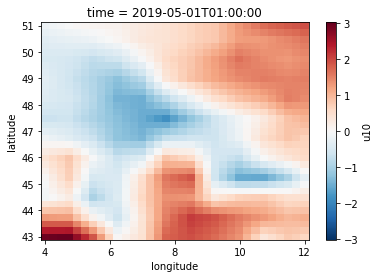

In [22]:
weather_dataset_final.isel(time=[0]).u10.plot()

#Togheter

In [23]:
 dataset_togheter = NOX_dataset_tot.merge(weather_dataset_final)
 dataset_togheter = dataset_togheter.drop_vars('crs')
 dataset_togheter

<xarray.Dataset>
Dimensions:         (latitude: 33, longitude: 33, time: 720)
Coordinates:
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
  * latitude        (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude       (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables: (12/15)
    EMISSIONS_2019  (time, latitude, longitude) float64 1.15e-12 ... 1.858e-11
    u10             (latitude, longitude, time) float64 2.961 3.289 ... 1.402
    v10             (latitude, longitude, time) float64 -5.035 -4.351 ... 0.7725
    hcc             (latitude, longitude, time) float64 0.0 0.0 ... 0.5467
    lcc             (latitude, longitude, time) float64 0.0456 ... 0.1776
    tcc             (latitude, longitude, time) float64 0.04669 ... 0.734
    ...              ...
    tmp             (latitude, longitude, time) float64 263.7 263.2 ... 269.5
    sp_hum          (latitude, longitude, time) float64 3.887e-06 ... 4.031e-06
    rel_hum         (latitude, longitude, time) float64 0.0002269 ... 0.0001404
    tcwv            (latitude, longitude, time) float64 14.68 14.25 ... 25.37
    tcw             (latitude, longitude, time) float64 14.68 14.25 ... 25.4
    tot_wind        (latitude, longitude, time) float64 5.915 5.533 ... 1.625
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

In [24]:
dataset_togheter.to_netcdf('MAY_HOURLY_2019_NOX_and_weather.nc', 'w', 'NETCDF4')